<a href="https://colab.research.google.com/github/Norrica/ml_course/blob/master/lab_pandas_Ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
best_bar= pd.read_csv('/content/drive/My Drive/Учеба/Зюзин/flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [5]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [6]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.tail() 

,company_loc,rate,percent,bean_orig
1790,Austria,3.75,70%,Peru
1791,Austria,3.00,65%,Congo
1792,Austria,3.50,65%,India
1793,Austria,3.25,62%,India
1794,Austria,3.00,65%,Brazil


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормального (распределение Гаусса). Поэтому графики плотности еще называют ядерной оценки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

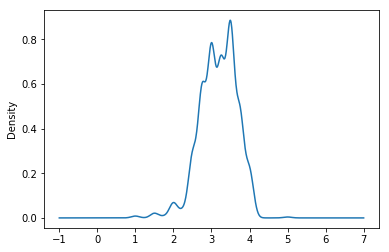

In [7]:
# code here
#plt.kind="kde"
best_bar.rate.plot(kind="kde")


Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Гистограмму для такого типа построить не получится. 
Необходимо преобразовать данный тип в float с помощью функции apply. Внутри функции apply используйте lambda выражение, чтобы убрать знак '%' в конце каждого элемента, а затем преобразовать данные в тип с плавающей точкой.

In [0]:
best_bar.percent = best_bar.percent.apply(lambda x : float(x[:2]) )

In [9]:
best_bar

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru
5,France,2.75,70.0,Venezuela
6,France,3.50,70.0,Cuba
7,France,3.50,70.0,Venezuela
8,France,3.75,70.0,Venezuela
9,France,4.00,70.0,Peru


Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.
Необходимо это для того, чтобы оценить зависимость рейтинга от содержания кокао в батончиках. 

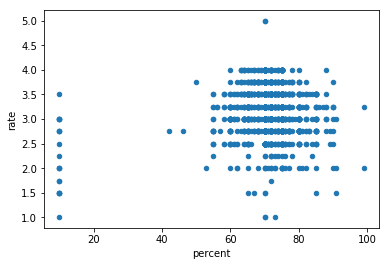

In [10]:
# code here

best_bar.plot(kind = 'scatter', x= 'percent', y = 'rate')

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: rate, dtype: float64
count    1795.000000
mean       70.693593
std         8.513727
min        10.000000
25%        70.000000
50%        70.000000
75%        75.000000
max        99.000000
Name: percent, dtype: float64


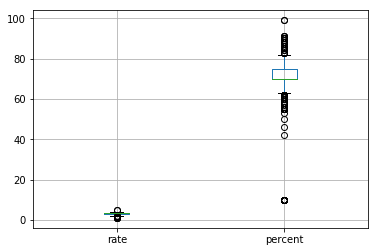

In [11]:
best_bar.boxplot(column = ['rate','percent'])
print(best_bar.rate.describe())
print(best_bar.percent.describe())

## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удастся, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [12]:
# code here
kateg = pd.value_counts(best_bar.company_loc), pd.value_counts(best_bar.bean_orig)
kateg

(U.S.A.               764
 France               156
 Canada               125
 U.K.                  96
 Italy                 63
 Ecuador               54
 Australia             49
 Belgium               40
 Switzerland           38
 Germany               35
 Austria               26
 Spain                 25
 Colombia              23
 Hungary               22
 Venezuela             20
 Madagascar            17
 Peru                  17
 Japan                 17
 New Zealand           17
 Brazil                17
 Denmark               15
 Vietnam               11
 Scotland              10
 Guatemala             10
 Costa Rica             9
 Israel                 9
 Argentina              9
 Poland                 8
 Lithuania              6
 Honduras               6
 South Korea            5
 Sweden                 5
 Nicaragua              5
 Domincan Republic      5
 Mexico                 4
 Amsterdam              4
 Ireland                4
 Puerto Rico            4
 Sao Tome   

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

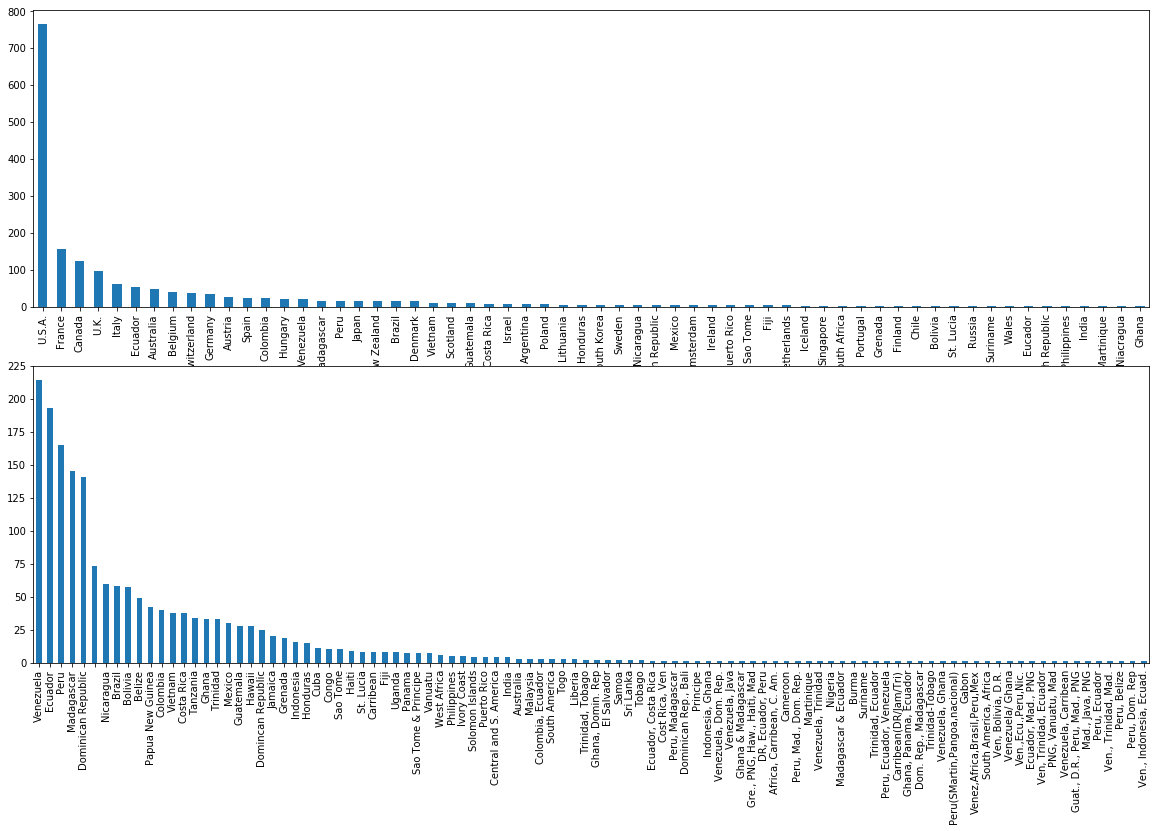

In [24]:
# code here
size = (20,12)
fig, axes = plt.subplots(nrows=2, ncols=1)
kateg[0].plot(kind = 'bar',ax=axes[0], figsize=size)
kateg[1].plot(kind = 'bar',ax=axes[1], figsize=size)


По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis': где 0 - удалять по строкам (объектам), 1 - удалять по столбцам (признакам); 'how': где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [14]:
# code here
best_bar.dropna(axis = 0, how = 'any', inplace=True)
# best_bar

<bound method DataFrame.dropna of      company_loc  rate  percent           bean_orig
0         France  3.75     63.0            Sao Tome
1         France  2.75     70.0                Togo
2         France  3.00     70.0                Togo
3         France  3.50     70.0                Togo
4         France  3.50     70.0                Peru
5         France  2.75     70.0           Venezuela
6         France  3.50     70.0                Cuba
7         France  3.50     70.0           Venezuela
8         France  3.75     70.0           Venezuela
9         France  4.00     70.0                Peru
10        France  2.75     70.0              Panama
11        France  3.00     70.0          Madagascar
12        France  3.25     70.0              Brazil
13        France  3.75     70.0             Ecuador
14        France  2.75     70.0            Colombia
15        France  3.00     70.0               Burma
16        France  3.25     70.0    Papua New Guinea
17        France  4.00     70.

Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [15]:
# code here
best_bar.bean_orig.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [0]:
# code here
buf = best_bar['bean_orig'] != '\xa0'
best_bar = best_bar[buf]

Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [0]:

count = best_bar['bean_orig'].value_counts()
orig = count[count<=7].index
best_bar = best_bar.replace(orig,'complex')


Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

In [19]:
best_bar.head()

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,complex
2,France,3.00,70.0,complex
3,France,3.50,70.0,complex
4,France,3.50,70.0,Peru


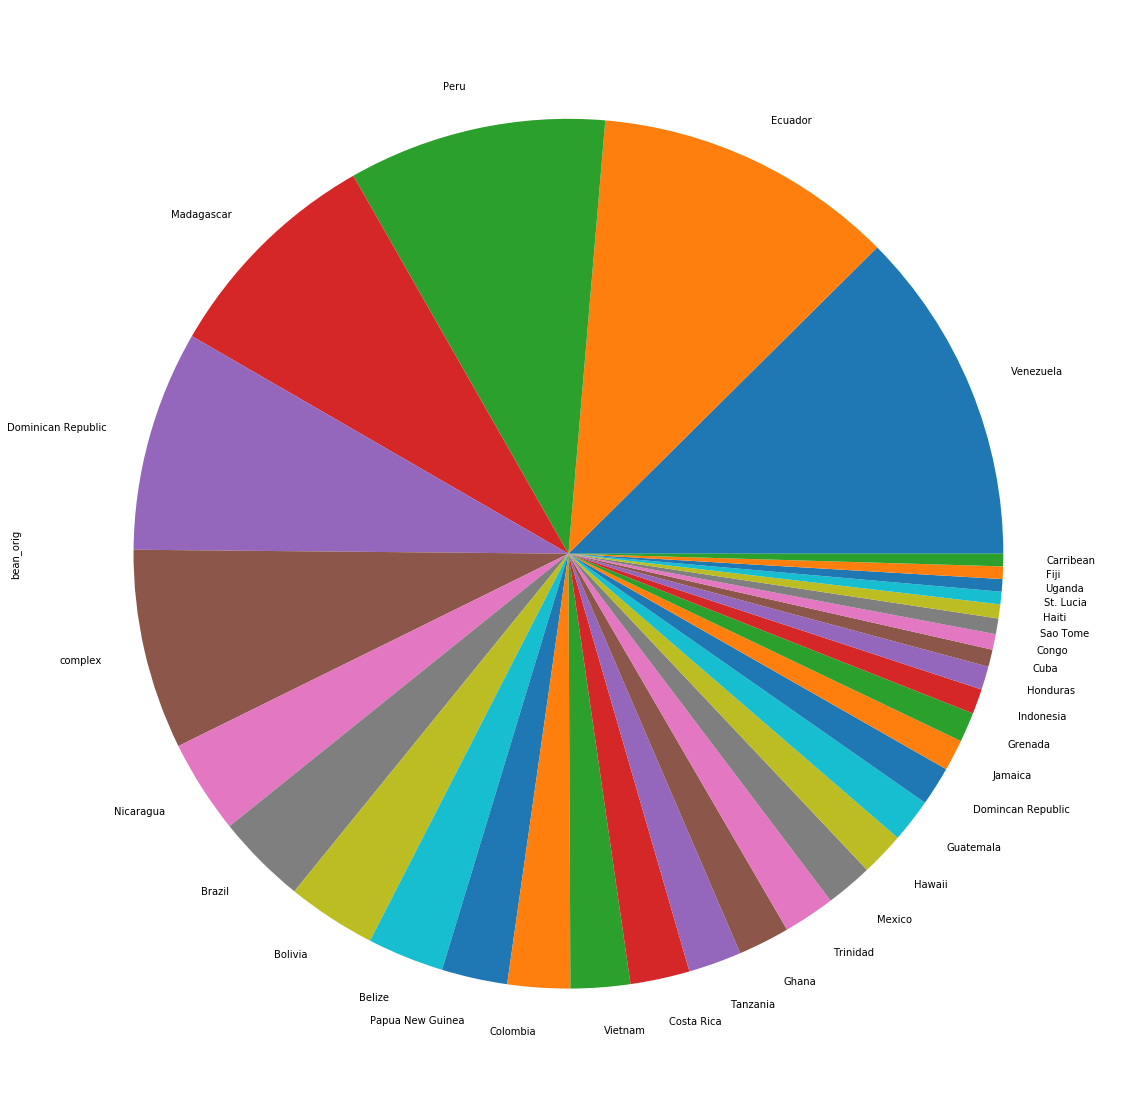

In [20]:
# code here
best_bar.bean_orig.value_counts().plot.pie(figsize=(20,20))

## Попарные графики распределений

In [0]:
from sklearn import preprocessing
from seaborn import pairplot
from sklearn.preprocessing import OneHotEncoder


Построить попарные распределения для всех признаков.

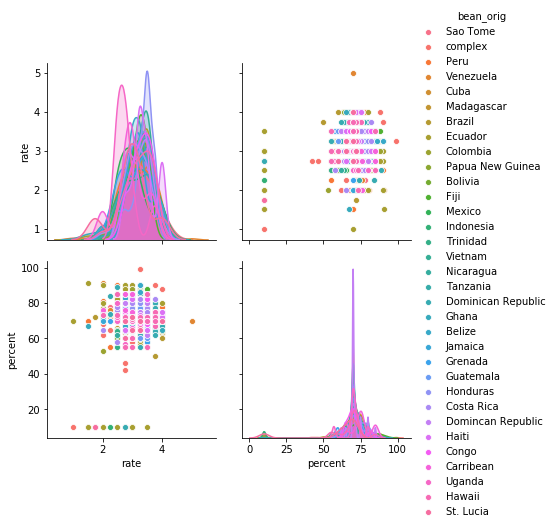

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


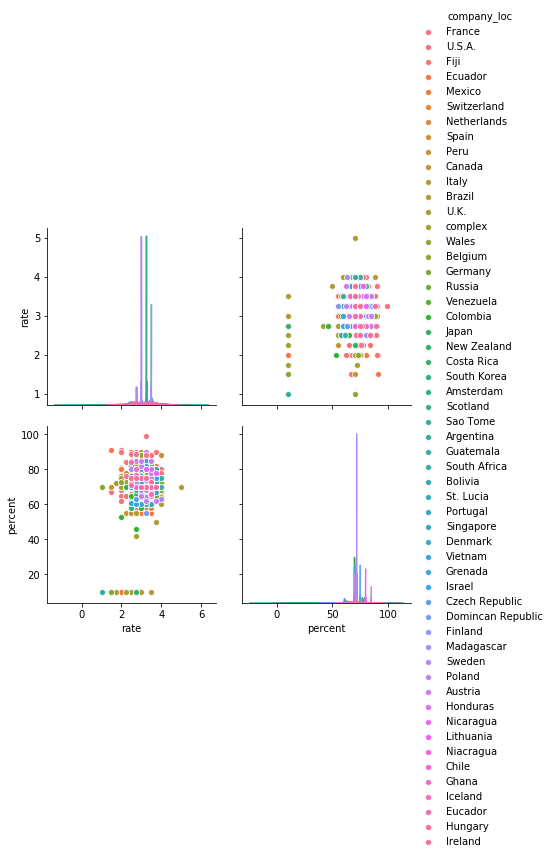

In [30]:
# code here
# best_bar.apply(LabelEncoder().fit_transform)
# preprocessing.LabelEncoder().fit_transform(best_bar)
pairplot(best_bar, height=3, hue ='bean_orig', palette ='husl')
plt.show()
pairplot(best_bar, height=3, hue ='company_loc', palette ='husl')


Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [31]:
# code here
mean_bean = best_bar.groupby(['bean_orig']).mean()
mean_bean = mean_bean.sort_values(by = 'rate', ascending = False).head(3)
mean_bean

,rate,percent
bean_orig,,
Haiti,3.388889,71.333333
Honduras,3.350000,73.933333
Congo,3.325000,70.500000


In [32]:
# code here
median_bean = best_bar.groupby(['bean_orig']).median()
median_bean = median_bean.sort_values(by = 'rate', ascending = False).head(3)
median_bean

,rate,percent
bean_orig,,
Honduras,3.500,72.0
Brazil,3.375,70.0
Vietnam,3.375,72.5


Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.